<a href="https://colab.research.google.com/github/ElvinGuluzade/DataScience/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (30 Points)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at 

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

          0
0  0.397470
1  0.302952
2  0.161456
3  0.071315
4  0.051383
5  0.015424
Answer q1.1 : 2
Answer q1.2 : 70%


 PCA :

[[-0.30018046 -0.6143442 ]
 [ 0.50371538 -0.26353415]
 [-0.36363296 -0.57076551]
 [ 0.52621504 -0.21051407]
 [ 0.15821829  0.19532841]
 [ 0.47116694 -0.380642  ]]


 Unrotated FA :

[[ 0.91639593  0.1231473 ]
 [-0.16959833  0.74233622]
 [ 0.9493102   0.0174767 ]
 [-0.24348583  0.75021151]
 [-0.18118035  0.0286029 ]
 [-0.06211276  0.82810382]]


 Varimax FA :

[[ 0.92457783  0.01012876]
 [-0.077522    0.75750709]
 [ 0.94431928 -0.09877442]
 [-0.14989135  0.77436118]
 [-0.17632109  0.05055014]
 [ 0.03964755  0.82948297]]


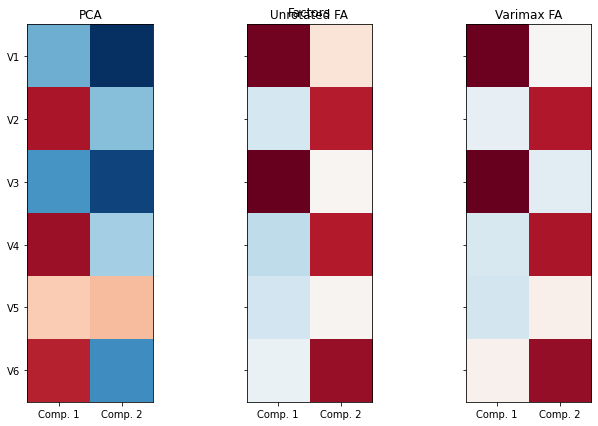

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv')

x = StandardScaler().fit_transform(df)
x = pd.DataFrame(x)
x.columns=df.columns

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
print(pd.DataFrame(pca.explained_variance_ratio_))
print("Answer q1.1 : 2")
print("Answer q1.2 : 70%")
print("Answer q1.3 : ")
methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax"))]

fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 6))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=2)
    fa.fit(x)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(x.columns)))
    if ax.is_first_col():
        ax.set_yticklabels(x.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [ ]:
#Q2
import pandas as pd
breast_dataset=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Bcancer.csv')
breast_dataset
y=breast_dataset['label']
X=breast_dataset.drop(['label'], axis = 1)
X

Q2) (70 points)Using breast cancer data above, 

(1) split the data two : training (65%) and testing (35%)

(2) Using logistic regression model in train data, get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(3)Using knn model in train data(choose k based on CV), get the performance metric on test data(accuracy,recall, precision confusuion matrix). What is the k value chosen based on k?

(4)Using naive  model in train data, get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(5)Using SVM with parameter tuning(you can use optuna) in train data ,get the performance metric on test data(accuracy,recall, precision confusuion matrix)